# Alura - Data Science: Testando Relações com Regressão Linear

## Ajustando uma reta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Lendo os dados
dados = pd.read_csv('/content/house_prices.csv')
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
dados.drop(columns=['Id'], inplace=True)

In [6]:
# Correlação com o preço de venda
corr = dados.corr()
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


In [7]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr)
mascara[np.triu_indices_from(mascara)] = True

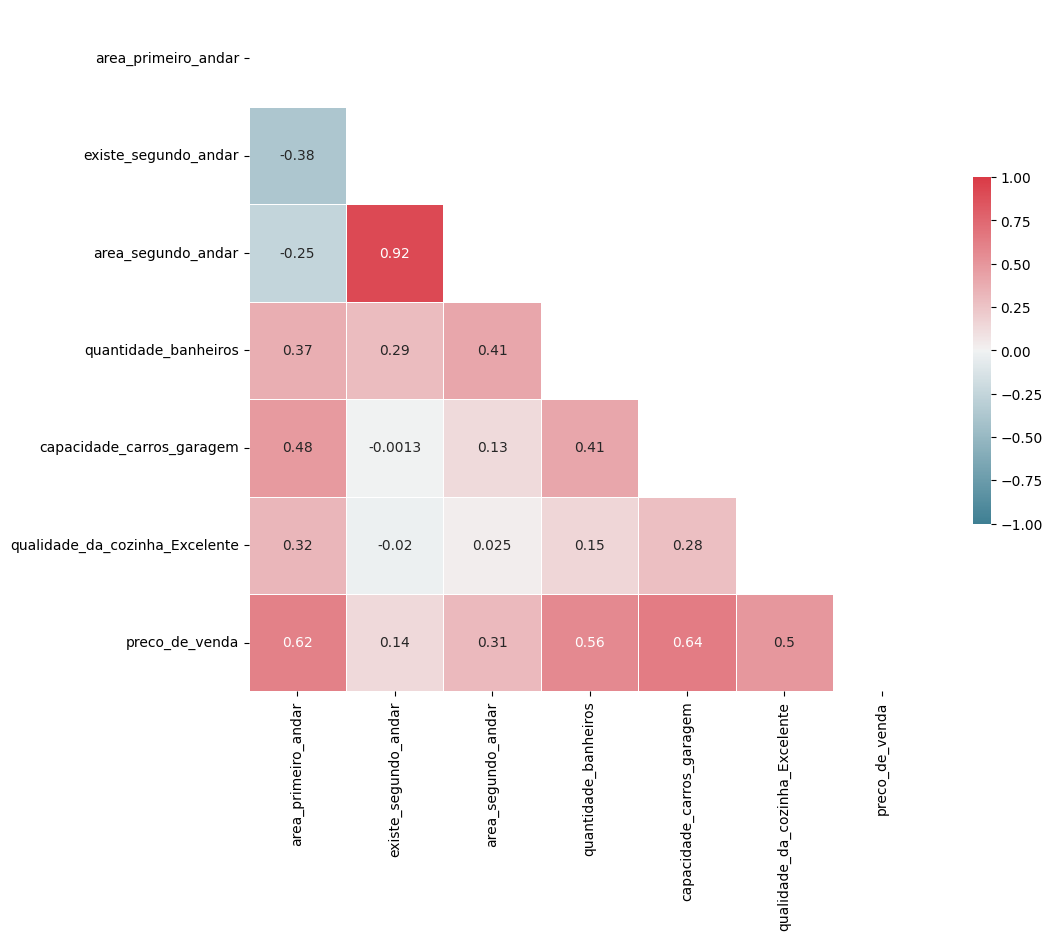

In [8]:
# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

### Relacionando variáveis

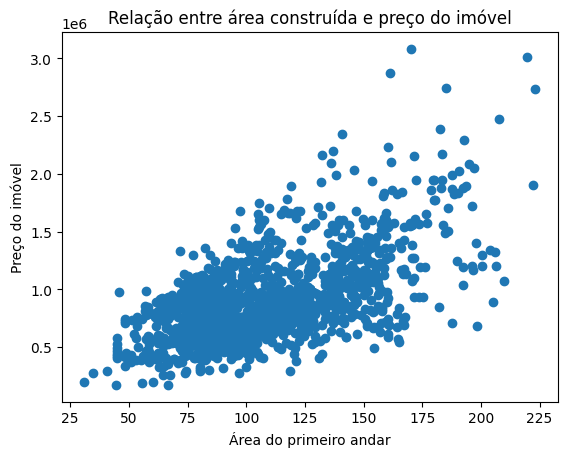

In [9]:
# Relação entre área construída e preço do imóvel
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre área construída e preço do imóvel')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço do imóvel')
plt.show()

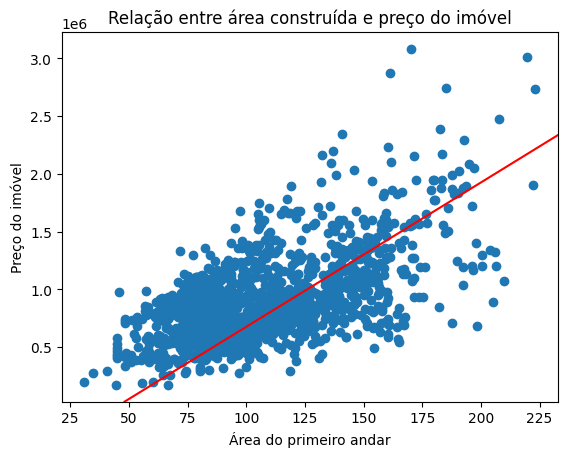

In [10]:
# Traçando uma linha
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color='red')
plt.title('Relação entre área construída e preço do imóvel')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço do imóvel')
plt.show()

### Achando a melhor reta

In [11]:
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda',
           trendline_color_override='red', trendline='ols')

## Explicando a reta

- Variável independente: área do primeiro andar
- Variável dependente: preço da casa
- Entender quais fatores explicam o preço da casa

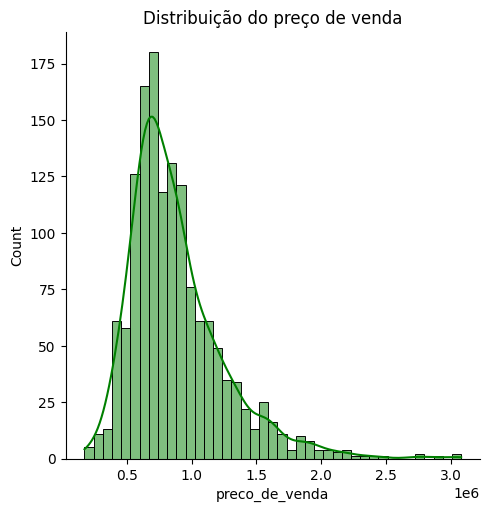

In [12]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = dados['preco_de_venda']
x = dados.drop(columns='preco_de_venda')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [16]:
df_train = pd.DataFrame(data=x_train)
df_train['preco_de_venda'] = y_train

In [17]:
from statsmodels.formula.api import ols

In [18]:
# Ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

### Analisando os coeficientes

In [19]:
# Visualizando os parâmetros
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


- A tabela mostra que um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R\$ 6.793 no valor da casa
- O intercepto diz que caso a área do primeiro andar seja zero, a média esperada do preço de venda será R\$ 152.909
- O sinal positivo diz que um aumento na área do primeiro andar contribui positivamente para o preço médio da casa

In [20]:
# Resumo do modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        13:03:27   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

- **Teste t**: testa se a variável tem efeito suficiente para estimar o valor da casa
- **p-valor**: Quando muito baixo, a variável produz um efeito significativo para estabelecer o preço da casa

---------

- ❗ **A equação da reta: Yi = Bo + B1*X1** ::
    - Y é a variável resposta ou dependente, quem estamos querendo prever
    - Bo é o intercepto
    - B1 é a inclinação, coeficiente angular, é o impacto de cada variável explicativa X na variável resposta
    - X é a variável explicativa ou independente, é o fator usado para prever e explicar a variável resposta

### Explicabilidade do Modelo

- Quanto a variabilidade da área está explicando os diversos preços das casas?
- Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [21]:
# Observando o R² do treino
modelo_0.rsquared

np.float64(0.37728010994297867)

### Entendendo o resíduo

In [22]:
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


- A observação 1.303 mostra que tivemos uma diferença de R\$ 193.023,00 a menos em relação ao preço estimado, ou seja, estamos precificando a menos do que o real valor

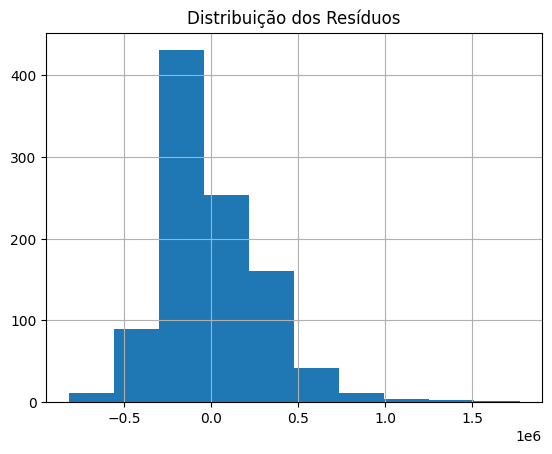

In [23]:
modelo_0.resid.hist()
plt.title('Distribuição dos Resíduos')
plt.show()

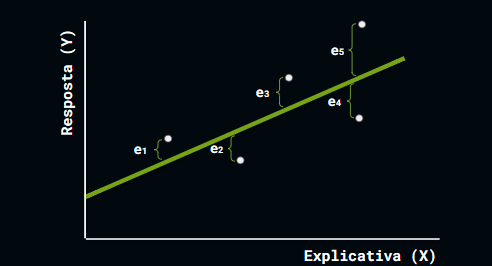

### Obtendo o R² da previsão

In [24]:
# Definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
print('R²: ', r2_score(y_test, y_predict))

R²:  0.38530928723202407


- Esses 38% é explicado somente pela área do primeiro andar, ainda existem outras variáveis

## Adicionando Outros Fatores

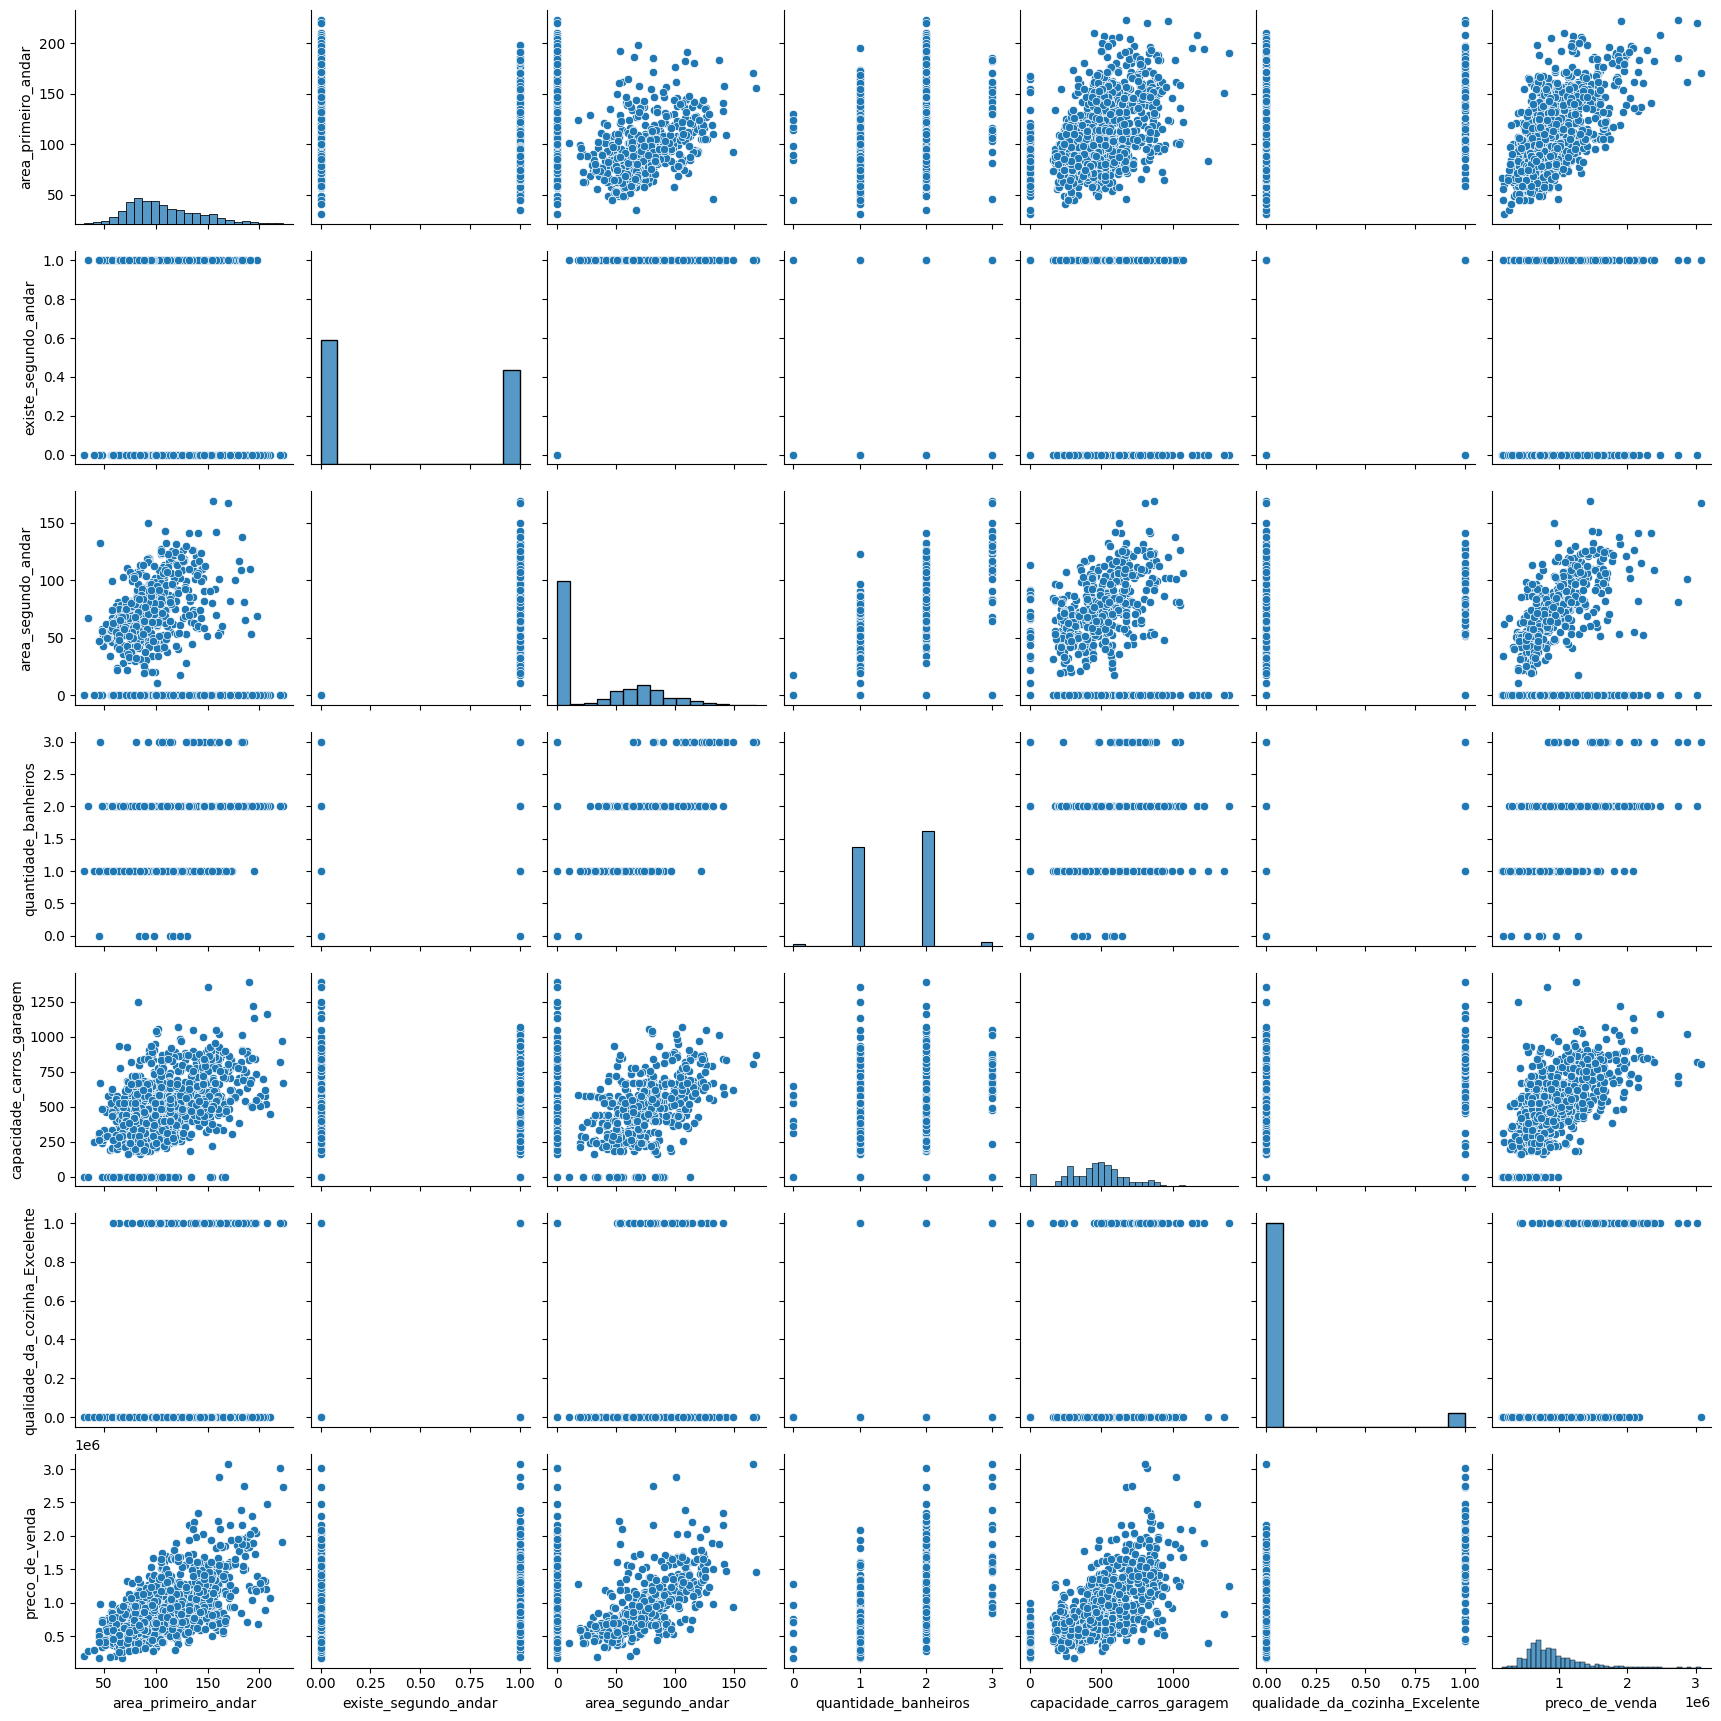

In [27]:
# Quais outras características poderiam explicar o preço dos imóveis
sns.pairplot(dados)

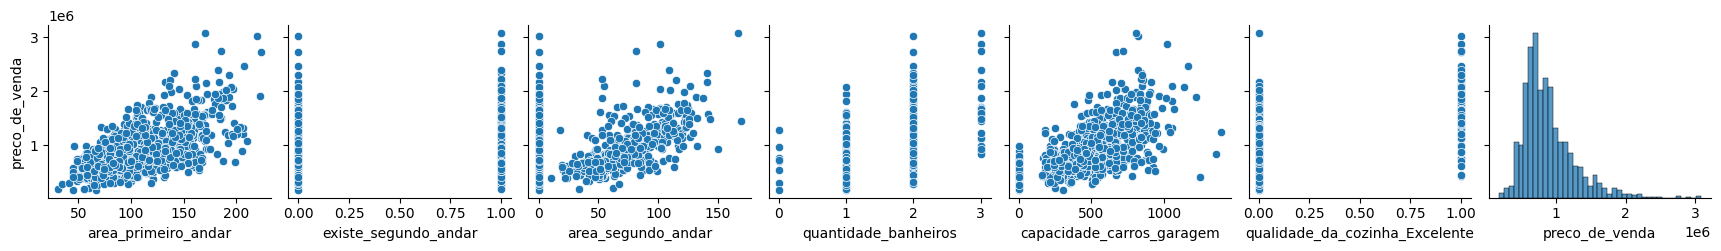

In [28]:
# Observando somente com relação ao preço de venda
sns.pairplot(dados, y_vars='preco_de_venda')

In [29]:
import statsmodels.api as sm

In [30]:
# Adicionando uma constante
x_train = sm.add_constant(x_train)
x_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [31]:
# Criando o modelo de regressão saturado
modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                          'area_segundo_andar', 'quantidade_banheiros',
                          'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]
                  ).fit()

In [32]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                           'quantidade_banheiros', 'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]
                  ).fit()

In [33]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                           'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]
                  ).fit()

In [34]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          2.79e-289
Time:                        13:03:36   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [35]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.93e-264
Time:                        13:03:36   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [36]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          4.15e-227
Time:                        13:03:36   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Comparando modelos

In [37]:
print('R²')
print('Modelo 0: ', modelo_0.rsquared)
print('Modelo 1: ', modelo_1.rsquared)
print('Modelo 2: ', modelo_2.rsquared)
print('Modelo 3: ', modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [38]:
# Quantos parâmetros estão no modelo?
print('Modelo 0: ', len(modelo_0.params))
print('Modelo 1: ', len(modelo_1.params))
print('Modelo 2: ', len(modelo_2.params))
print('Modelo 3: ', len(modelo_3.params))

Modelo 0:  2
Modelo 1:  7
Modelo 2:  6
Modelo 3:  5


- Modelo 3 será selecionado devido a não existência de muticolinearidade entre as variáveis

In [39]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


- **O valor de cada uma dessas variáveis é considerado isoladamente**, considerando todas as outras como constantes
- Pode ser considerado que ao construir um segundo banheiro, a casa tenha um aumento de R\$ 149.036 no valor da venda

## Precificando as casas

### Obtendo o R² da previsão

In [40]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [41]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [42]:
# Adicionando uma constante em x_test
x_test = sm.add_constant(x_test)
x_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [43]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(x_test[['const', 'area_primeiro_andar',
                                     'existe_segundo_andar',
                                     'quantidade_banheiros',
                                     'qualidade_da_cozinha_Excelente']])

In [44]:
# Qual o r² da previsão
modelo_3.rsquared

np.float64(0.6511289354898803)

In [45]:
# Qual o r² do treino
print('R²: ', r2_score(y_test, predict_3))

R²:  0.6432078074497706


- É importante observar que os dois R² estejam bem parecidos, porque isso significa que o modelo possui uma capacidade de explicação parecida entre treino e teste

In [49]:
# Novo imóvel
novo_imovel = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]
})

In [50]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


In [52]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020515


### Precificando várias casas

In [54]:
# Lendo várias casas
novas_casas = pd.read_csv('novas_casas.csv', sep=';')
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [55]:
novas_casas.drop(columns='Casa', inplace=True)

In [56]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [57]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


## Investigando o modelo

### Multicolinearidade

- Quando dois ou mais fatores estudados são tão parecidos que é difícil dizer o quanto cada um deles está influenciando o resultado

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
explicativas_1 = ['const', 'area_primeiro_andar', 'existe_segundo_andar',
                  'area_segundo_andar', 'quantidade_banheiros',
                  'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const', 'area_primeiro_andar', 'existe_segundo_andar',
                  'quantidade_banheiros', 'capacidade_carros_garagem',
                  'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const', 'area_primeiro_andar', 'existe_segundo_andar',
                  'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [64]:
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1['vif'] = [variance_inflation_factor(x_train[explicativas_1], i)
                    for i in range(len(explicativas_1))]

In [65]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


- Quanto menor o vif, menor é a presença de multicolinearidade

In [66]:
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3['vif'] = [variance_inflation_factor(x_train[explicativas_3], i)
                    for i in range(len(explicativas_3))]

In [67]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


### Análise dos resíduos

- Discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados

In [68]:
# Prevendo os valores do treino x_train[explicativas_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])

In [69]:
# Fazendo um scatter plot entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsão X Real',
                 labels={'x': 'Preço Previsto', 'y': 'Preço Real'})
fig.show()

### Identificando Homocedasticidade

In [70]:
# Resíduos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

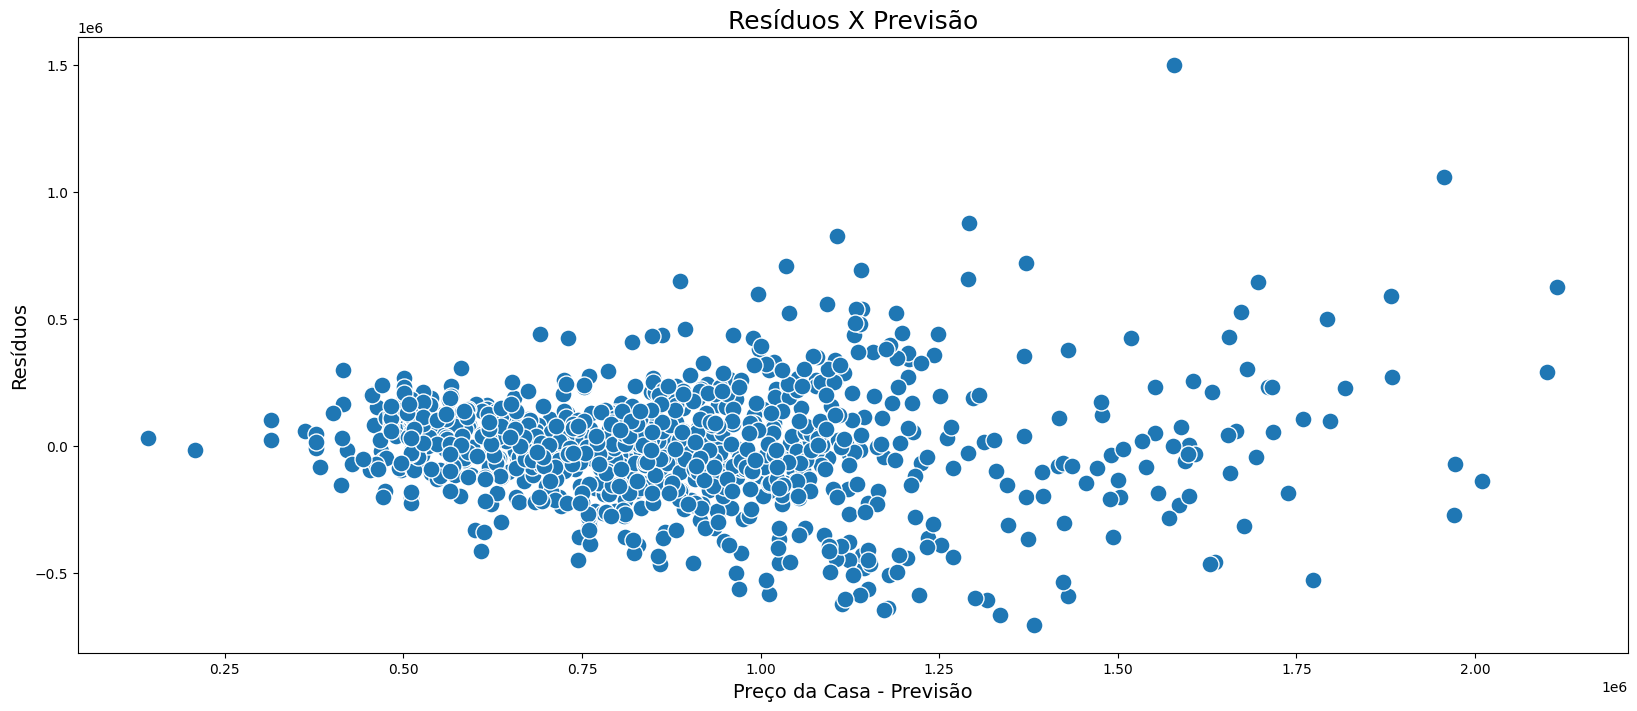

In [72]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

- A maioria dos resíduos está em torno de zero, o que é ótimo, pois queremos que a diferença entre o observado e o previsto seja o mais próximo de zero possível
- No entanto, quanto mais cara é o preço das casas, mais dispersos os resíduos ficam
- **Homocedasticidade**: Quando os pontos estão dispostos de forma aleatória em torno do zero, o que queremos.
- **Heterocedasticidade**: Situação em que a variância dos erros de um modelo não é constante ao longo do intervalo de valores previstos. Quando há um padrão no gráfico, pontos em forma de parábola ou de cone.
- Para avaliar a presença de heterocedasticidade, podem ser usados os testes de White e Breusch-Pagan